In [471]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from glob import glob
import csv

In [374]:
import os

data = os.listdir("/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive")
len(data)

280

In [375]:
data[:5]

['9036', '10268', '10257', '8913', '13613']

In [332]:
patient_8863 = os.listdir("/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/8863")

In [333]:
patient_8863

['0', '1']

In [334]:
patient_8863_0 = os.listdir("/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/8863/0")
patient_8863_1 = os.listdir("/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/8863/1")


In [335]:
print(len(patient_8863_0))
print(len(patient_8863_1))

772
207


In [336]:
print(patient_8863_0[:5])
print(patient_8863_1[:5])

['8863_idx5_x1251_y2101_class0.png', '8863_idx5_x501_y1801_class0.png', '8863_idx5_x351_y1351_class0.png', '8863_idx5_x1501_y451_class0.png', '8863_idx5_x2001_y251_class0.png']
['8863_idx5_x1551_y951_class1.png', '8863_idx5_x1001_y1551_class1.png', '8863_idx5_x1151_y1601_class1.png', '8863_idx5_x1151_y901_class1.png', '8863_idx5_x1201_y1001_class1.png']


In [337]:
df_0 = pd.DataFrame()
listOfFiles = [patient_8863_0, patient_8863_1]
idxNumber = 0
for i in listOfFiles:
    for path in i:
        split = path.split('_')
    # Extract elements 2 and 3, substringing the first char
        x_coord = split[2][1:]
        y_coord = split[3][1:]
        idc_class = split[4][5]
    
        data = {"idc_class": [idc_class],
                "x_coord": [x_coord],
                "y_coord": [y_coord],
                "index": [idxNumber],
                "path": ["/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/8863/"+ idc_class + "/"+path]}
        data_df = pd.DataFrame(data)
        idxNumber += 1
        df_0 = pd.concat([df_0, data_df])
    

In [338]:
df = df_0.set_index("index")

In [339]:
df['x_coord'] = df['x_coord'].astype('int')
df['y_coord'] = df['y_coord'].astype('int')
df['idc_class'] = df['idc_class'].astype('int')

In [340]:
df

,idc_class,x_coord,y_coord,path
index,,,,
0,0,1251,2101,/Users/carolina/Documents/Semester_8/Introduct...
1,0,501,1801,/Users/carolina/Documents/Semester_8/Introduct...
2,0,351,1351,/Users/carolina/Documents/Semester_8/Introduct...
3,0,1501,451,/Users/carolina/Documents/Semester_8/Introduct...
4,0,2001,251,/Users/carolina/Documents/Semester_8/Introduct...
...,...,...,...,...
974,1,1201,1451,/Users/carolina/Documents/Semester_8/Introduct...
975,1,1351,1701,/Users/carolina/Documents/Semester_8/Introduct...
976,1,1351,1001,/Users/carolina/Documents/Semester_8/Introduct...


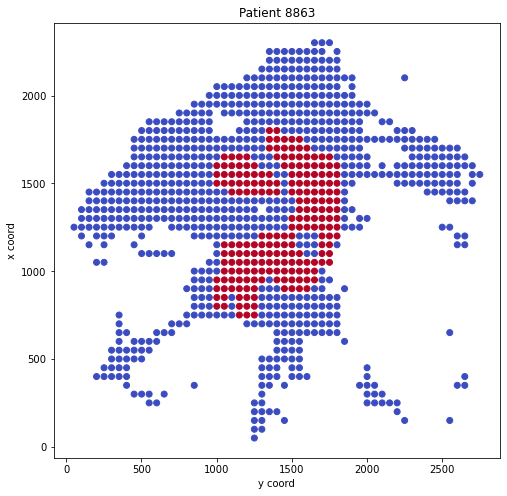

In [341]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x = df['x_coord'], y=df['y_coord'], c=df['idc_class'], cmap='coolwarm')
ax.set_title("Patient 8863")
ax.set_xlabel("y coord")
ax.set_ylabel("x coord")
plt.show()

In [342]:
max_x = df['x_coord'].max()
max_y = df['y_coord'].max()

grid = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)
mask = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)

In [343]:
for i in range(len(df)):
        # Get image and label
        OldImage = cv2.imread(df['path'][i])
        idc_class = df['idc_class'][i]
        
        dim = (50, 50)
        
        image = cv2.resize(OldImage, dim, interpolation = cv2.INTER_AREA)
        # Extract X and Y coordinates
        x_coord = df['x_coord'][i]
        y_coord = df['y_coord'][i]
        # Add 50 pixels to find ending boundary for each image
        x_end = x_coord + 50
        y_end = y_coord + 50
        
        # Assign image pixel values to placeholder 255 values
        """
        Image is something along the lines of:
        [[[206 164 226]
          [196 154 224]
          [211 175 225]
          ...
          [237 221 240]
          [214 184 232]
          [235 213 243]],
          ...        
        """
        
        # `grid` will then contain each patch's image values encoded into the grid
        grid[y_coord:y_end, x_coord:x_end] = image
        
        # If `idc_class` is `1`, change the RED channel of the `mask` to 255 (intense red)
        # and other channels to `0` (remove color info, leaving just red)
        if idc_class == 1:
            mask[y_coord:y_end, x_coord:x_end, :1] = 255
            mask[y_coord:y_end, x_coord:x_end, 1:] = 0

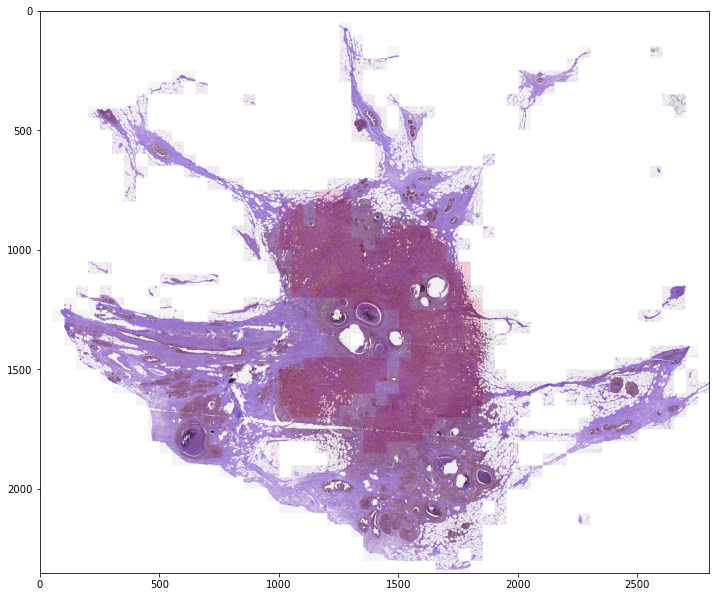

In [344]:
plt.figure(figsize=(12, 12))
plt.imshow(grid)
plt.imshow(mask, alpha=0.1)
plt.show()

In [345]:
data = glob('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/**/*.png', recursive=True)
print(len(data))

277524


In [346]:
data[:1]

['/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/9036/0/9036_idx5_x1051_y2401_class0.png']

In [347]:
split = data[0].split('_')
print(split)
x_coord = split[9][1:]
y_coord = split[10][1:]
idc_class = split[11][5]

print(x_coord, y_coord, idc_class)

['/Users/carolina/Documents/Semester', '8/Introduction', 'to', 'Machine', 'Learning', 'and', 'Data', 'Mining/Project/archive/9036/0/9036', 'idx5', 'x1051', 'y2401', 'class0.png']
1051 2401 0


In [348]:
patient_id = split[7].split('/')
print(patient_id[-1])

9036


In [352]:
df_0 = pd.DataFrame()
idxNumber = 0
for path in data:
    split = path.split('_')
    # Extract elements 2 and 3, substringing the first char
    patient_id = split[7].split('/')[-1]
    x_coord = split[9][1:]
    y_coord = split[10][1:]
    idc_class = split[11][5]
    
    df_data = {"idc_class": [idc_class],
               "patient_id": [patient_id],
               "x_coord": [x_coord],
               "y_coord": [y_coord],
               "path": [path],
               "index": [idxNumber]}
    idxNumber += 1
    data_df = pd.DataFrame(df_data)
    df_0 = pd.concat([df_0, data_df])
    

In [355]:
df = df_0.set_index("index")

In [356]:
df['patient_id'] = df['patient_id'].astype('int')
df['x_coord'] = df['x_coord'].astype('int')
df['y_coord'] = df['y_coord'].astype('int')
df['idc_class'] = df['idc_class'].astype('int')

In [357]:
df.head()

,idc_class,patient_id,x_coord,y_coord,path
index,,,,,
0,0,9036,1051,2401,/Users/carolina/Documents/Semester_8/Introduct...
1,0,9036,2951,951,/Users/carolina/Documents/Semester_8/Introduct...
2,0,9036,3001,1451,/Users/carolina/Documents/Semester_8/Introduct...
3,0,9036,3051,801,/Users/carolina/Documents/Semester_8/Introduct...
4,0,9036,951,1901,/Users/carolina/Documents/Semester_8/Introduct...


In [359]:
os.makedirs('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/DataFrame', exist_ok=True)
df.to_csv('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/DataFrame/all.csv') 

In [364]:
path = '/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/DataFrame/all.csv'

df = pd.read_csv(path)

In [368]:
df = df.set_index("index")

In [369]:
df

,idc_class,patient_id,x_coord,y_coord,path
index,,,,,
0,0,9036,1051,2401,/Users/carolina/Documents/Semester_8/Introduct...
1,0,9036,2951,951,/Users/carolina/Documents/Semester_8/Introduct...
2,0,9036,3001,1451,/Users/carolina/Documents/Semester_8/Introduct...
3,0,9036,3051,801,/Users/carolina/Documents/Semester_8/Introduct...
4,0,9036,951,1901,/Users/carolina/Documents/Semester_8/Introduct...
...,...,...,...,...,...
277519,1,8957,1951,701,/Users/carolina/Documents/Semester_8/Introduct...
277520,1,8957,2051,551,/Users/carolina/Documents/Semester_8/Introduct...
277521,1,8957,1951,651,/Users/carolina/Documents/Semester_8/Introduct...


import seaborn as sns
sns.countplot(x='idc_class', data=df)

In [402]:
df['patient_id'].value_counts()

13693    2395
16550    2302
10288    2278
10308    2278
9323     2216
         ... 
16895     151
9175      118
8957      111
9262       94
16534      63
Name: patient_id, Length: 279, dtype: int64

In [413]:
patient_ids = ['9036', '10268', '10257', '8913', '13613']

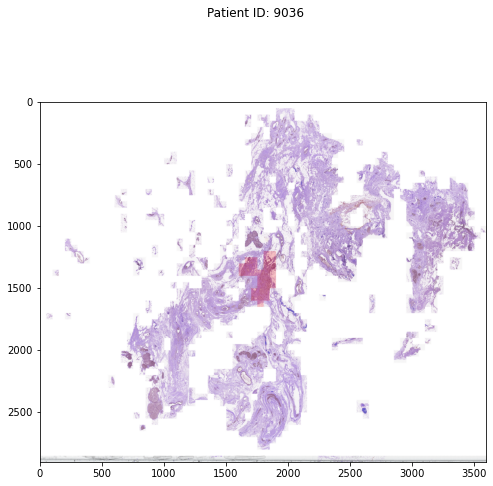

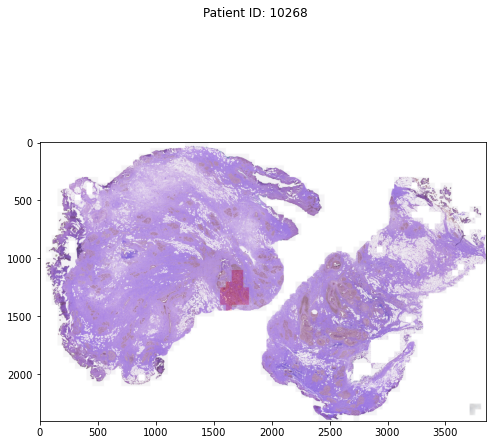

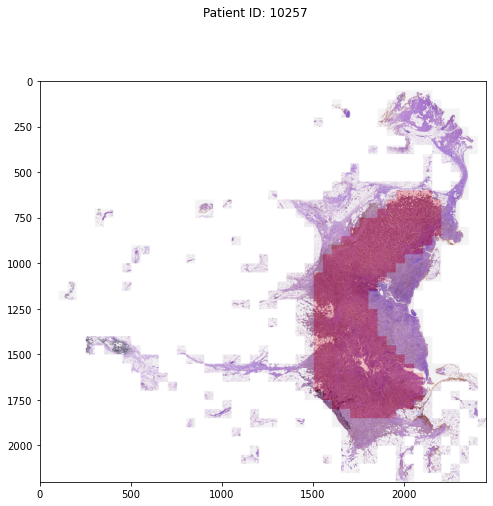

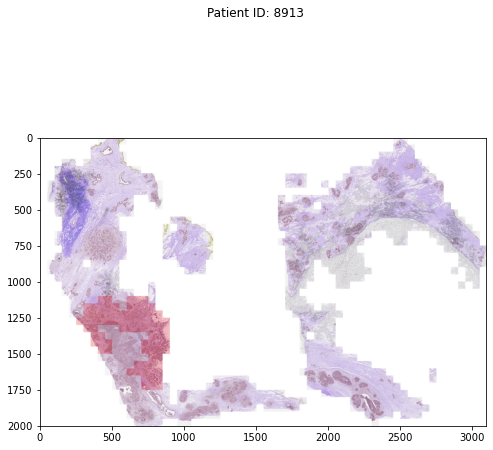

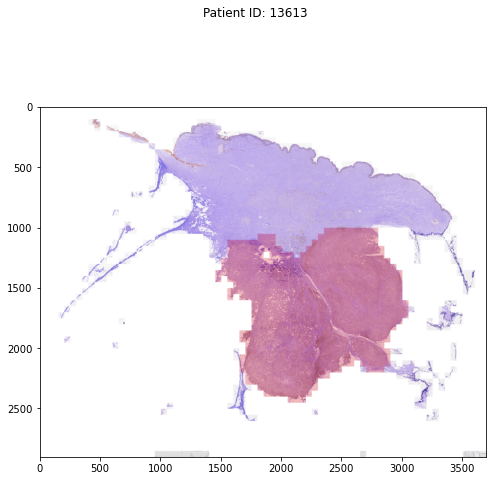

In [414]:
for patient_id in patient_ids:
    df_patient = df.loc[df['patient_id'] == int(patient_id)].reset_index(drop=True)
    max_x = df_patient['x_coord'].max()
    max_y = df_patient['y_coord'].max()
    
    grid = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)
    mask = 255*np.ones(shape = (max_y + 50, max_x + 50, 3)).astype(np.uint8)

    for i in range(len(df_patient)):
        # Get image and label
        oldImage = cv2.imread(df_patient['path'][i])
        # Image shape might not be 50x50, in which case, it's a broken patch
        # and we don't want to load it in
        dim = (50, 50)
        
        image = cv2.resize(oldImage, dim, interpolation = cv2.INTER_AREA)
        idc_class = df_patient['idc_class'][i]
        x_coord = df_patient['x_coord'][i]
        y_coord = df_patient['y_coord'][i]
        x_end = x_coord + 50
        y_end = y_coord + 50
            
        grid[y_coord:y_end, x_coord:x_end] = image

        if idc_class == 1:
            mask[y_coord:y_end, x_coord:x_end, :1] = 255
            mask[y_coord:y_end, x_coord:x_end, 1:] = 0
                
    plt.figure(figsize=(8, 8))
    plt.suptitle(f'Patient ID: {patient_id}')
    plt.imshow(grid)
    plt.imshow(mask, alpha=0.2)
    plt.show()

In [441]:
x = []
y = []

# Loading in 1000 images
for i in df["path"][:1000]:
    if i.endswith('.png'):
        label=i[-5]
        img = cv2.imread(i)
        # Transformation steps, such as resizing
        img = cv2.resize(img,(200,200))
        x.append(img)
        y.append(label)

In [432]:
df[df["path"] == '/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/9036/0/9036_idx5_x1051_y2401_class0.png']

,idc_class,patient_id,x_coord,y_coord,path
index,,,,,
0,0,9036,1051,2401,/Users/carolina/Documents/Semester_8/Introduct...


In [443]:
x = np.array(x, dtype='float16')
y = np.array(y, dtype='float16')

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y, shuffle=True, test_size=0.2)

In [444]:
X_train.shape

(800, 200, 200, 3)

In [464]:
if not os.path.exists('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/'):
    os.mkdir('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/')

    os.mkdir('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/train/')
    os.mkdir('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/test/')

    os.mkdir('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/train/0/')
    os.mkdir('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/train/1/')
    os.mkdir('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/test/0/')
    os.mkdir('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/test/1/')

In [466]:
# enumerate() to get `batch_num`, starting at 1
# range() starting at 1000 and incrementing in steps of 1000 towards the fifth of the length of the dataset
for batch_num, indices in enumerate(range(1000, int(len(df)/5), 1000), 1):
    x = []
    y = []
    
    # Load in `indices-1000` to `indices`
    # 0:1000, 1000:2000, 2000:3000, etc.
    for i in df["path"][indices-1000:indices]:
        if i.endswith('.png'):
            label=i[-5]
            img = cv2.imread(i)
            img = cv2.resize(img,(200,200))
            x.append(img)
            y.append(label)
        
    # Create NumPy Arrays from Python lists
    x = np.array(x, dtype='float16')
    y = np.array(y, dtype='float16')
    
    print(f'Processing batch {batch_num}, with images from {indices-1000} to {indices}')
    
    # Perform train-test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x,y, shuffle=True, test_size=0.2)
    
    # For each image in `x_train` - save it, including the associated batch_number and sample in the appropriate directory
    for index, img in enumerate(X_train):
        idc_class = y_train[index]
        cv2.imwrite(f"/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/train/{int(idc_class)}/batch_{batch_num}sample_{index}.png", img.astype('int'))
    
    # For each image in `x_test` - save it, including the associated batch_number and sample in the appropriate directory
    for index, img in enumerate(X_test):
        idc_class = y_test[index]
        cv2.imwrite(f"/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/test/{int(idc_class)}/batch_{batch_num}sample_{index}.png", img.astype('int'))

Processing batch 1, with images from 0 to 1000
Processing batch 2, with images from 1000 to 2000
Processing batch 3, with images from 2000 to 3000
Processing batch 4, with images from 3000 to 4000
Processing batch 5, with images from 4000 to 5000
Processing batch 6, with images from 5000 to 6000
Processing batch 7, with images from 6000 to 7000
Processing batch 8, with images from 7000 to 8000
Processing batch 9, with images from 8000 to 9000
Processing batch 10, with images from 9000 to 10000
Processing batch 11, with images from 10000 to 11000
Processing batch 12, with images from 11000 to 12000
Processing batch 13, with images from 12000 to 13000
Processing batch 14, with images from 13000 to 14000
Processing batch 15, with images from 14000 to 15000
Processing batch 16, with images from 15000 to 16000
Processing batch 17, with images from 16000 to 17000
Processing batch 18, with images from 17000 to 18000
Processing batch 19, with images from 18000 to 19000
Processing batch 20, wit

In [467]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.3)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/train/', 
                                                    batch_size=12, subset="training", 
                                                    class_mode='binary', 
                                                    target_size=(150, 150))
valid_generator = train_datagen.flow_from_directory('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/train/', 
                                                    batch_size=12, subset="validation", 
                                                    class_mode='binary',
                                                    shuffle=False,
                                                    target_size=(200, 200))
test_generator = test_datagen.flow_from_directory('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/test/', 
                                                  batch_size=12, 
                                                  class_mode='binary',
                                                  # Read note below 
                                                  shuffle=False,
                                                  target_size=(200, 200))

Found 30801 images belonging to 2 classes.
Found 13199 images belonging to 2 classes.
Found 11000 images belonging to 2 classes.


In [473]:
# After searching online to see if we should shuffle the test generator, there is a mix of information about it.
# Some say that suffling makes that at the end we will compare the predicted label with a random label.
# While others say that we should shuffle to reduce the bias.

In [472]:
class_weights = {0:1, 1:1.5}

In [475]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [494]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', kernel_initializer="he_normal", padding='same', input_shape=[200, 200, 3]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(64, 2, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.4),
    
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.5),
    
    keras.layers.Flatten(),    
    keras.layers.Dense(16, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

In [488]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(128, input_dim=30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [495]:
model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=[
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
              ])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 batch_normalization_25 (Bat  (None, 200, 200, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 100, 100, 32)      0         
                                                                 
 conv2d_25 (Conv2D)          (None, 100, 100, 64)      8256      
                                                                 
 batch_normalization_26 (Bat  (None, 100, 100, 64)    

In [498]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5)]


history = model.fit(train_generator,
                    validation_data = valid_generator,
                    callbacks = callbacks,
                    epochs = 15,
                    # Cost-sensitive learning
                    class_weight = class_weights)

Epoch 1/15
1926/1926 [==============================] - 1333s 692ms/step - loss: 0.4981 - binary_accuracy: 0.8205 - precision_4: 0.6382 - recall_4: 0.6919 - val_loss: 0.4181 - val_binary_accuracy: 0.8200 - val_precision_4: 0.6108 - val_recall_4: 0.8203
Epoch 2/15
1926/1926 [==============================] - ETA: 0s - loss: 0.4536 - binary_accuracy: 0.8397 - precision_4: 0.6747 - recall_4: 0.7235

KeyboardInterrupt: 

In [481]:
model.evaluate(test_generator)

688/688 [==============================] - 227s 329ms/step - loss: 1.2052 - binary_accuracy: 0.7432 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - auc_1: 0.5534


[1.2051961421966553, 0.7431818246841431, 0.0, 0.0, 0.5533685088157654]

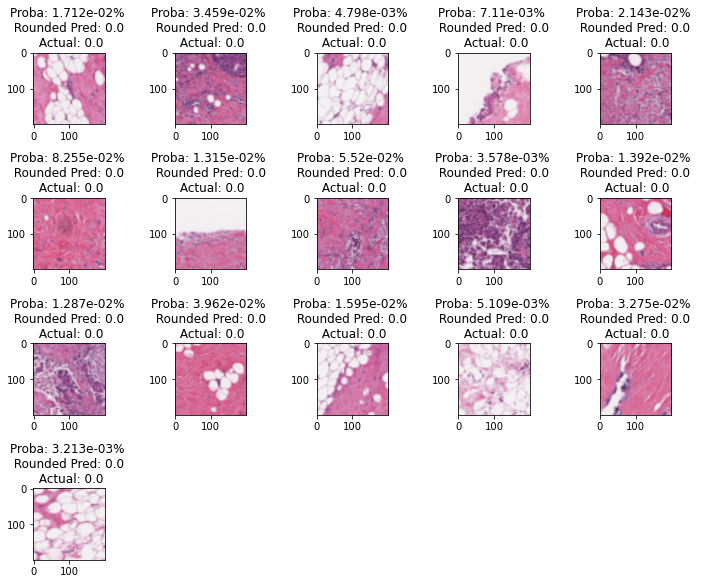

In [482]:
import cv2
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

batch = next(test_generator)
images = batch[0]
labels = batch[1]

for index, image in enumerate(images):
    ax = fig.add_subplot(5,5,index+1)
    plt.imshow(image.astype('int'))
    
    image = np.expand_dims(image, 0)
    pred = model.predict(image)
    pred = np.squeeze(pred)
    label = labels[index]
    
    ax.set_title(f'Proba: {np.format_float_scientific(pred, precision=3)}% \n Rounded Pred: {np.round(pred)} \n Actual: {label}')
    
    
plt.tight_layout()
plt.show()

In [483]:
y_pred = model.predict(test_generator)

<AxesSubplot:ylabel='count'>

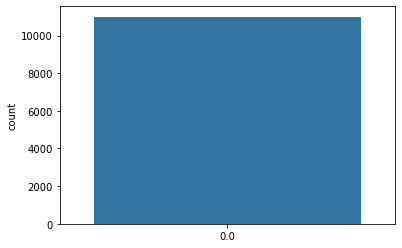

In [484]:
sns.countplot(x=np.round(np.squeeze(y_pred)))

In [485]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, np.round(y_pred)), annot=True, fmt='g')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [200, 11000]